In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error

In [4]:
files = []
for dirname, _, filenames in os.walk("/kaggle/input/playground-series-s4e6"):
    for filename in filenames:
        print(filename)
        files.append(pd.read_csv(os.path.join(dirname,filename)))

sample_submission.csv
train.csv
test.csv


In [5]:
df_train = files[1]
df_train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
df_test = files[2]
df_test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [7]:
subb = files[0]
subb.head()

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


In [8]:
df_train.shape

(76518, 38)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [10]:
df_train.isnull().sum()/len(df_train)*100

id                                                0.0
Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance                        0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                      

In [11]:
df_train.duplicated().sum()

0

In [12]:
cols = df_train.select_dtypes(include = "number").columns
cols

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

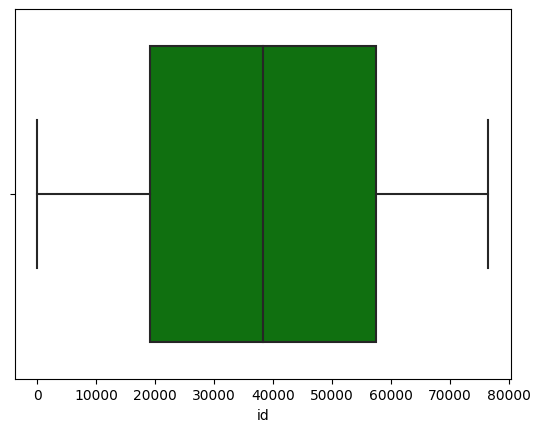

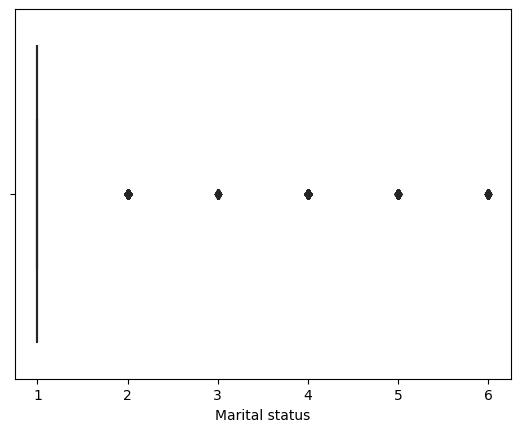

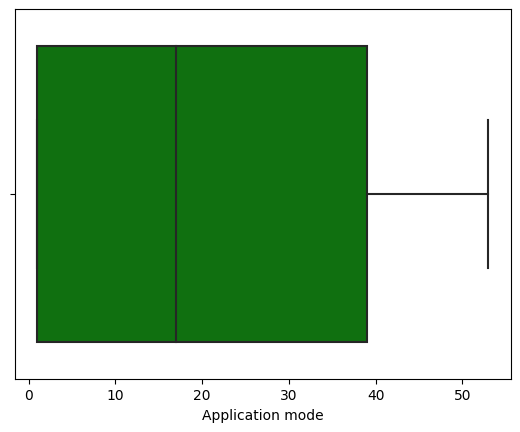

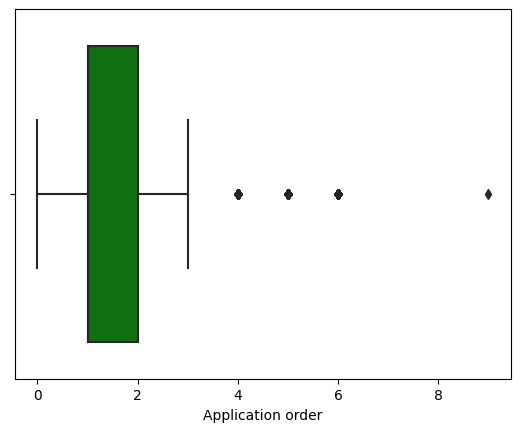

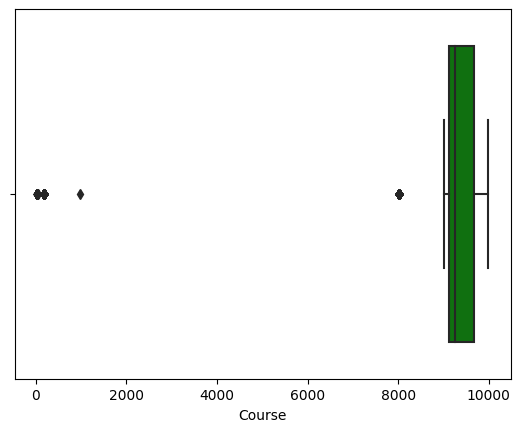

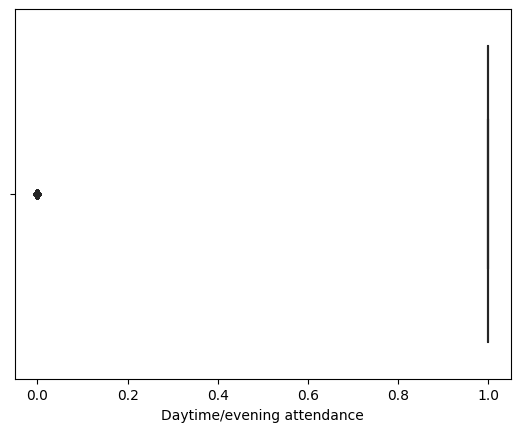

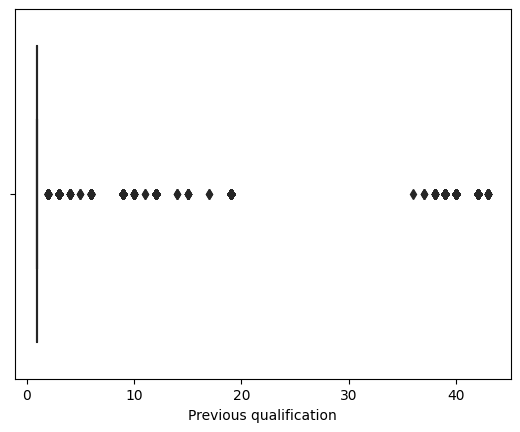

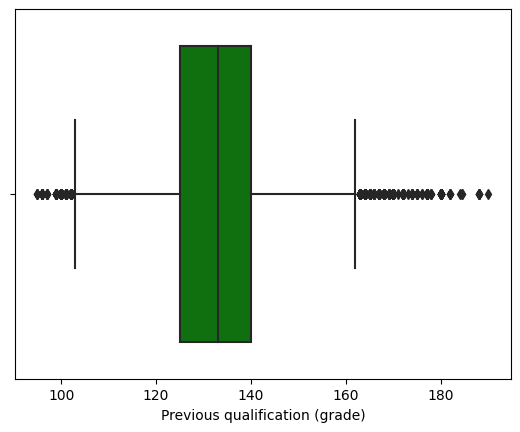

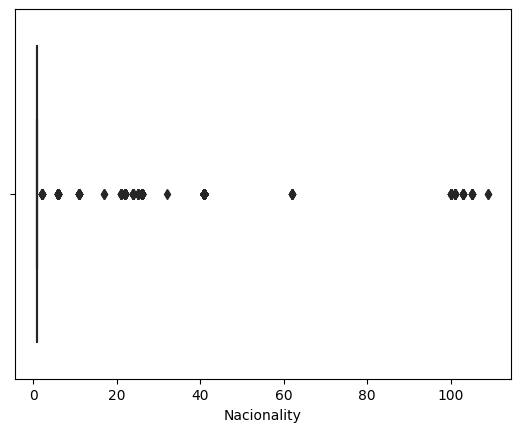

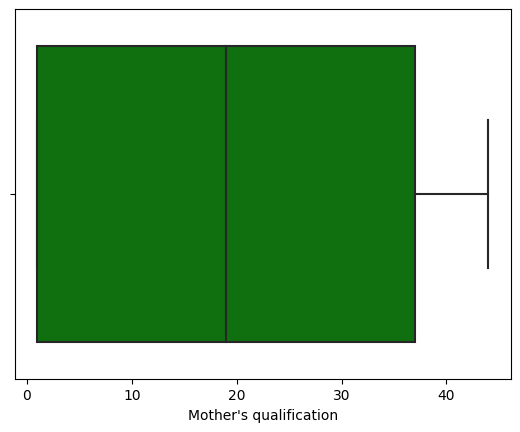

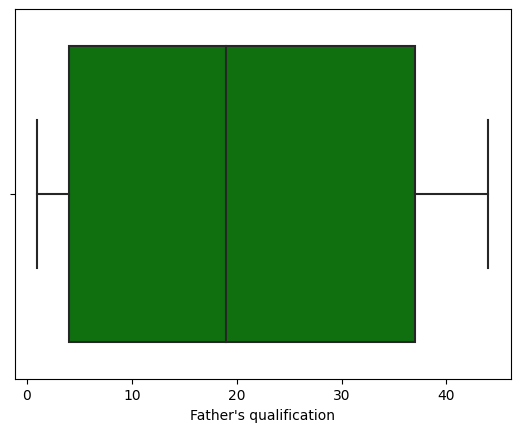

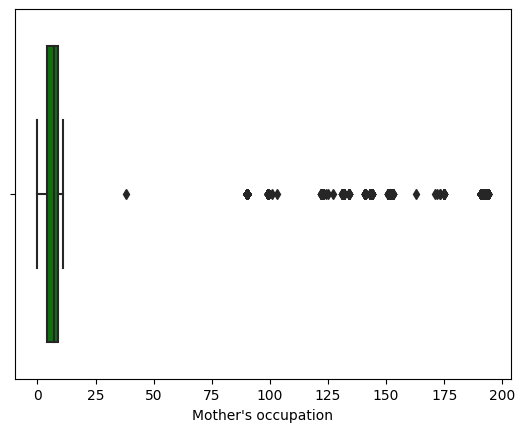

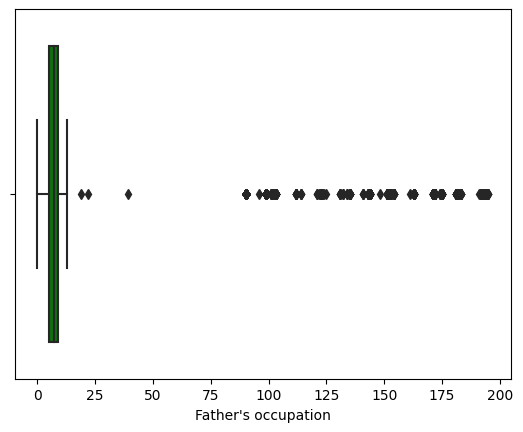

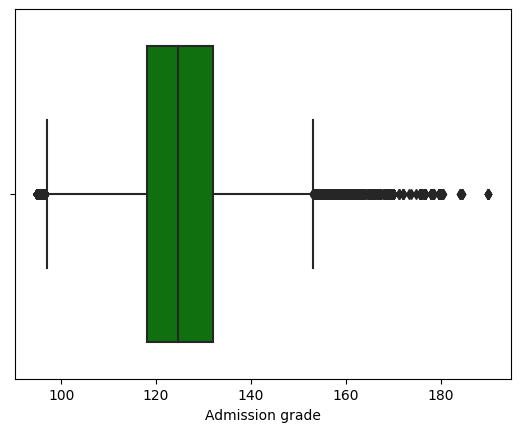

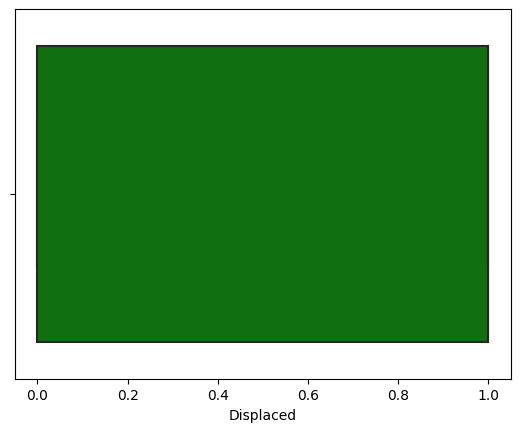

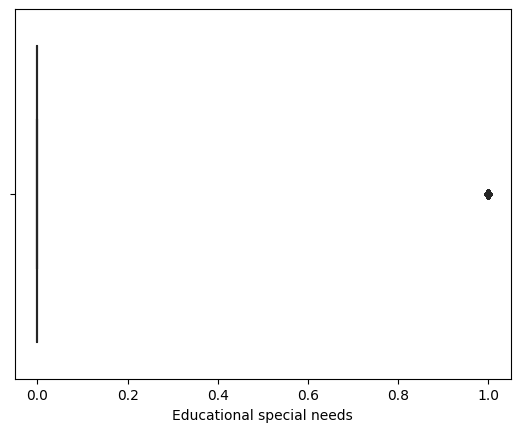

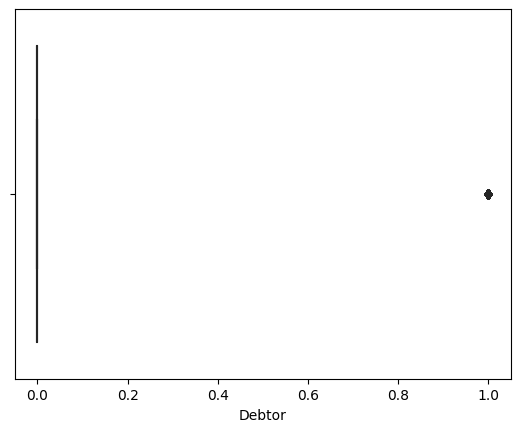

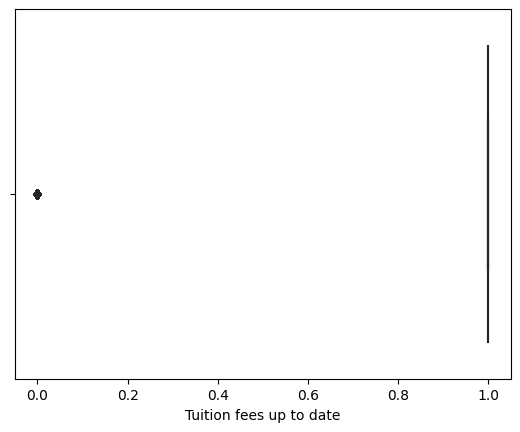

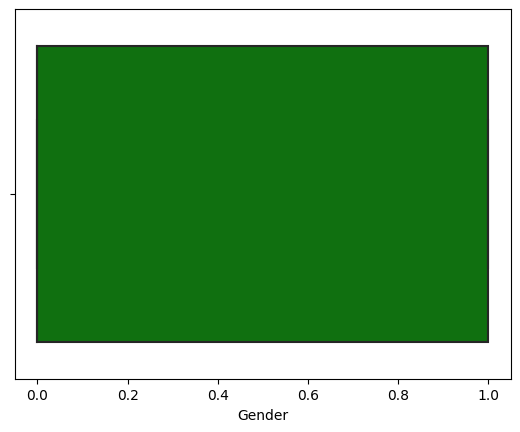

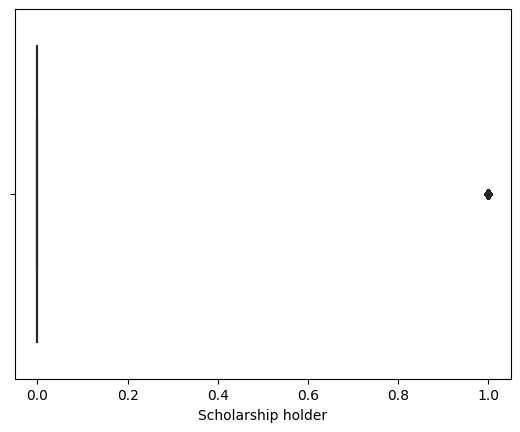

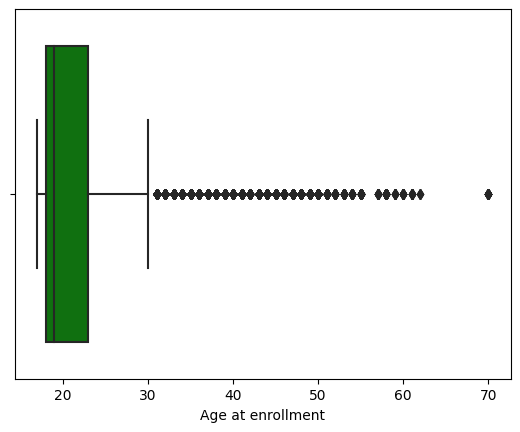

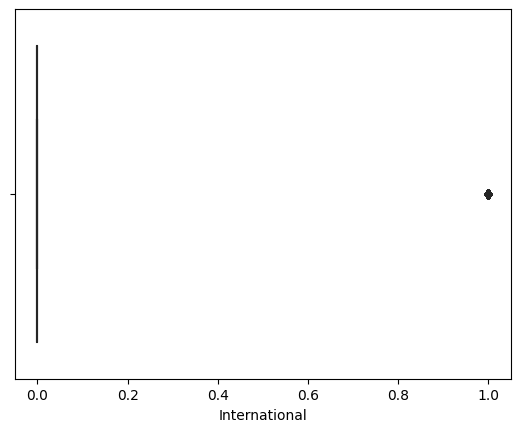

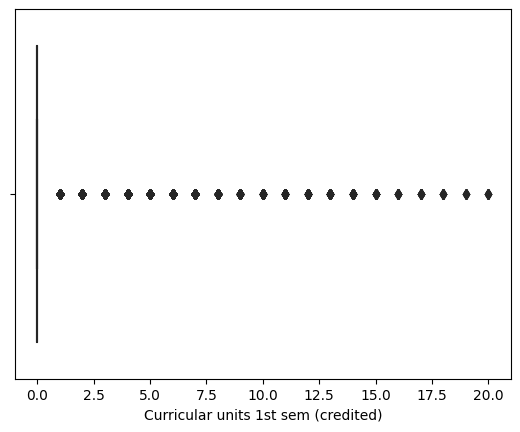

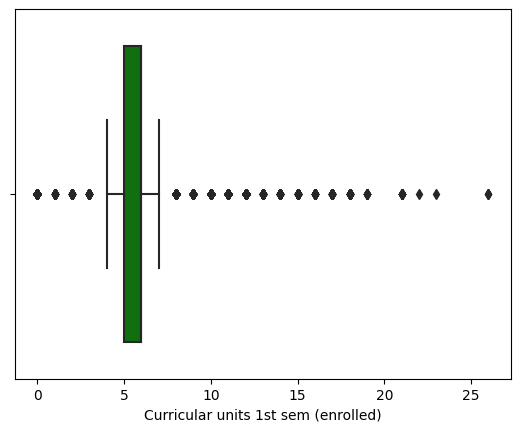

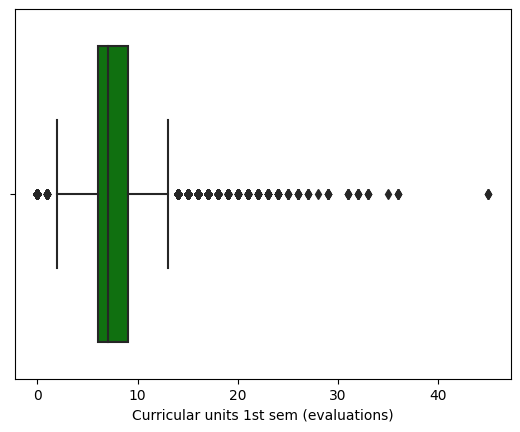

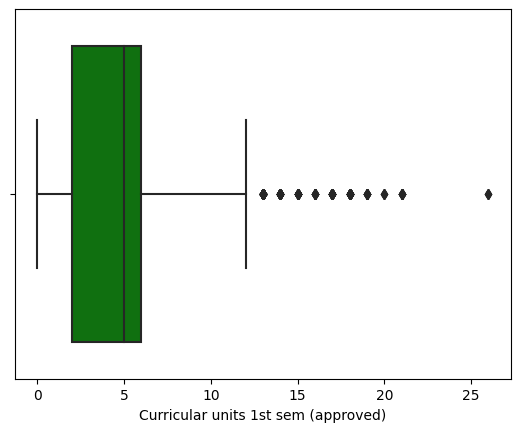

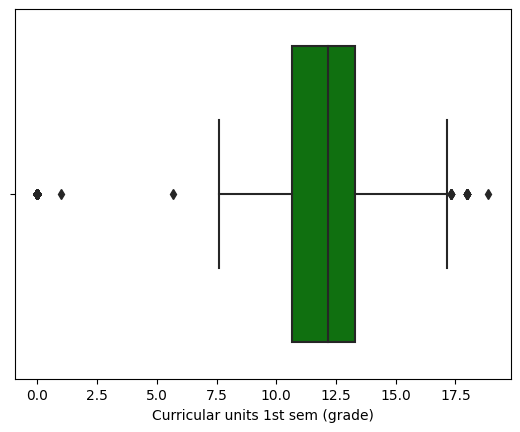

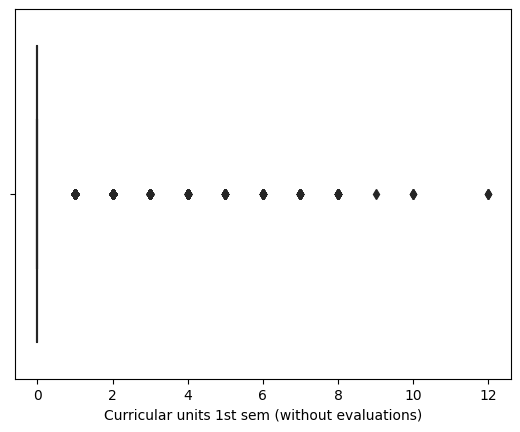

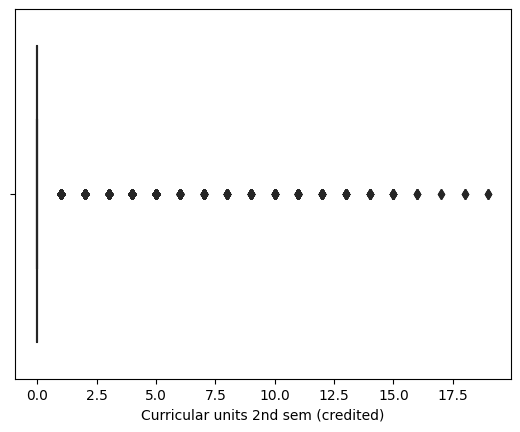

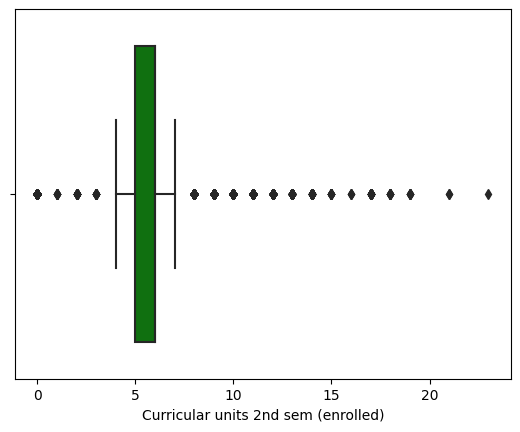

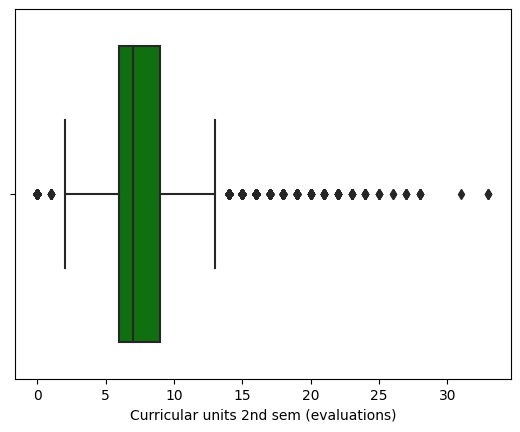

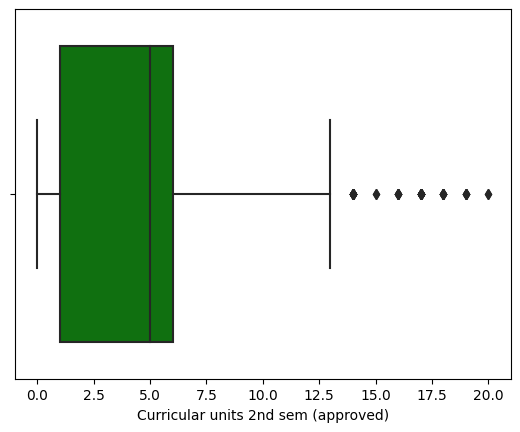

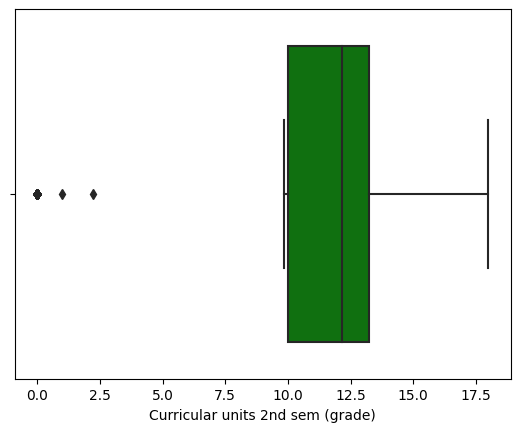

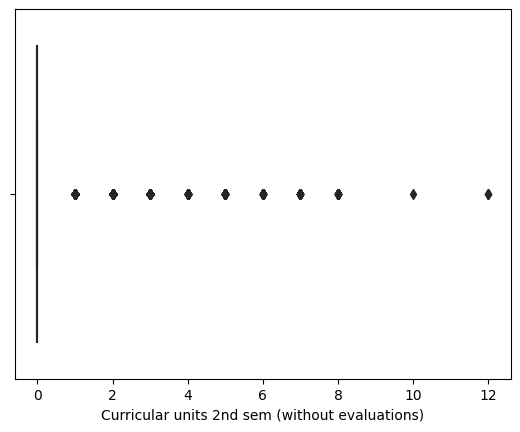

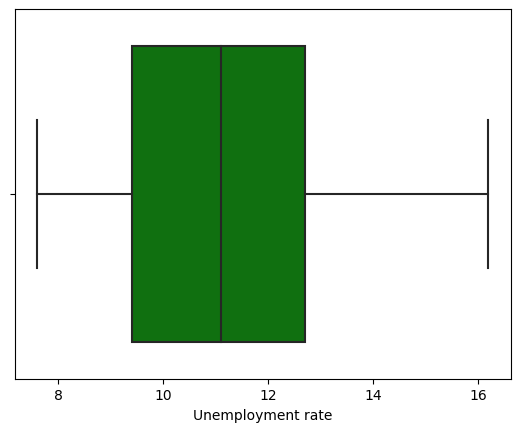

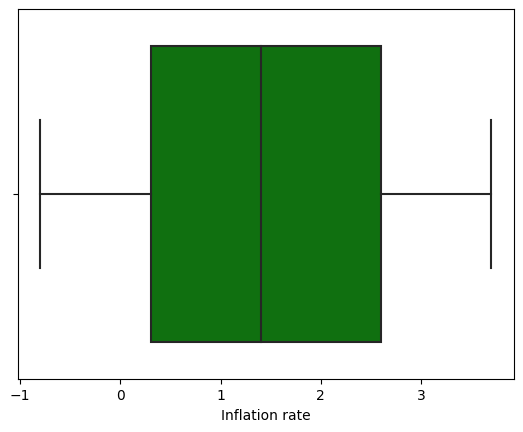

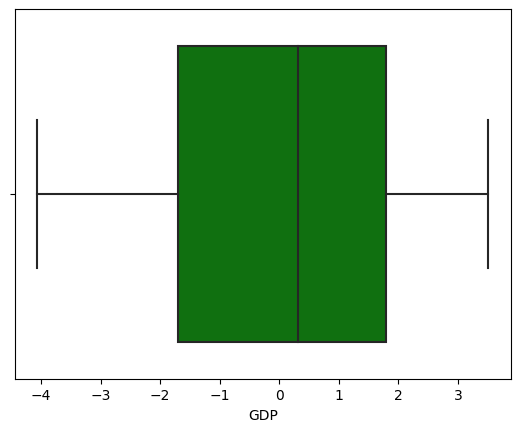

In [15]:
for i in cols:
    sns.boxplot(data = df_train, x = i, color = "green")
    plt.show()

Treatment

In [16]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - (1.5)*iqr
    uw = q3 + (1.5)*iqr
    return lw, uw

In [17]:
for i in cols:
    lw, uw = wisker(df_train[i])
    df_train[i] = np.where(df_train[i] < lw , lw, df_train[i])
    df_train[i] = np.where(df_train[i] > uw , uw, df_train[i])

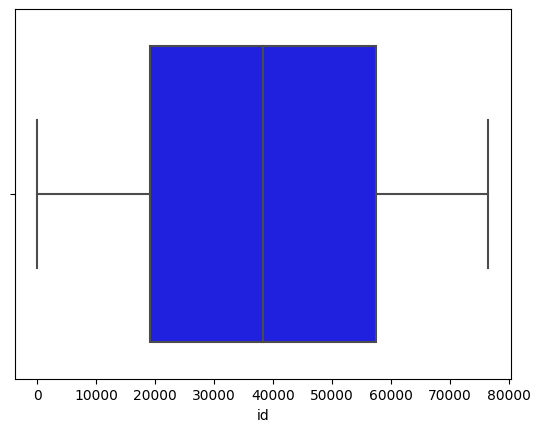

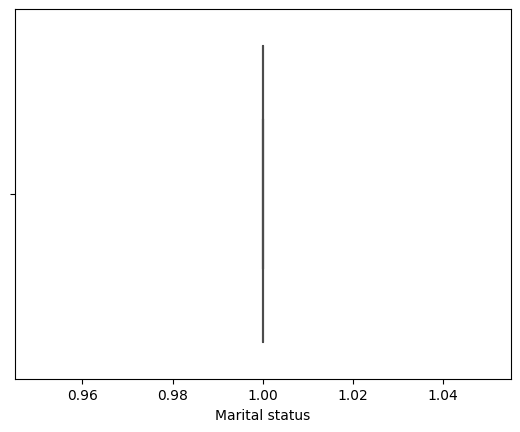

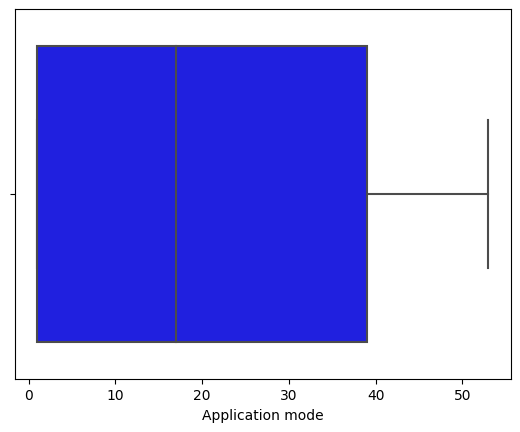

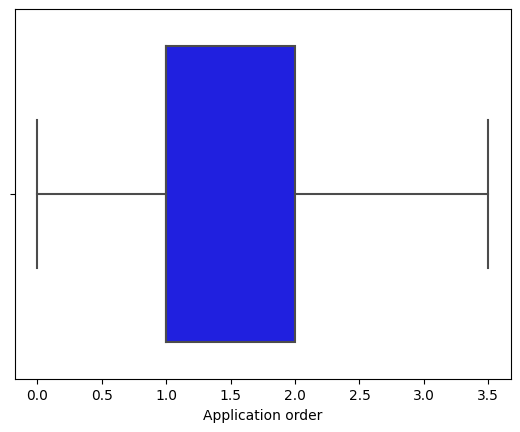

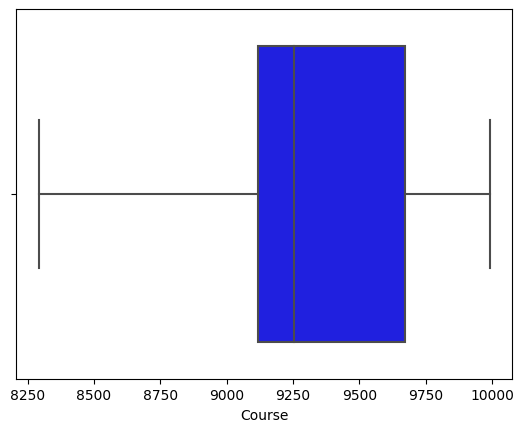

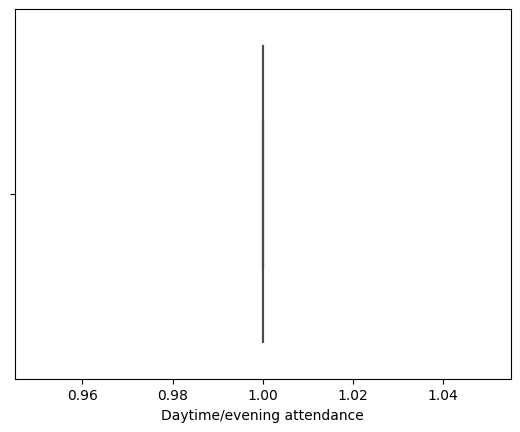

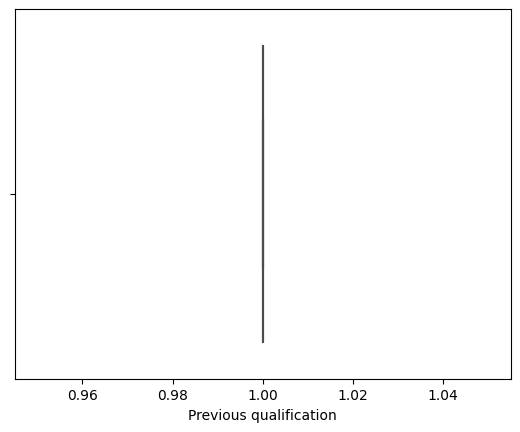

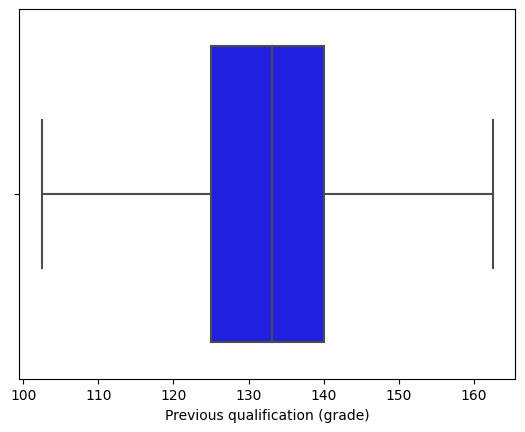

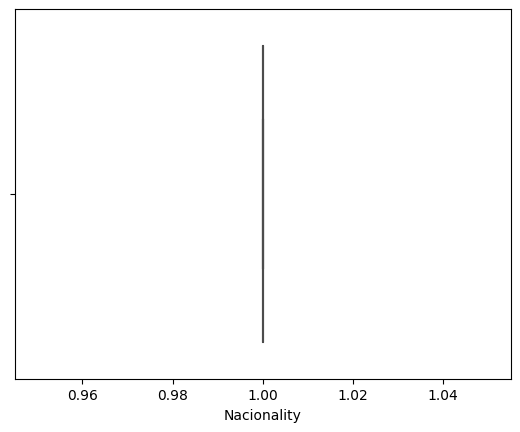

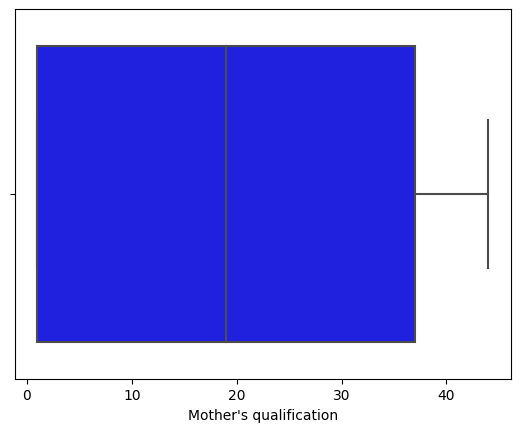

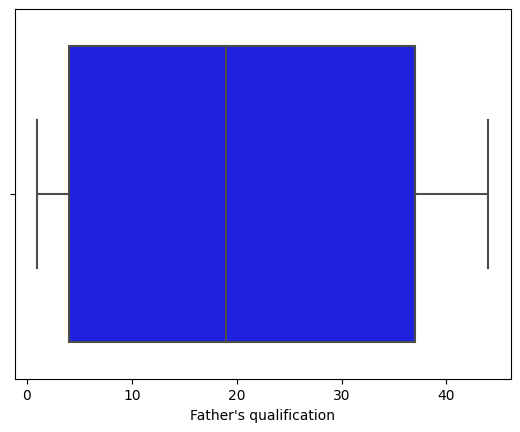

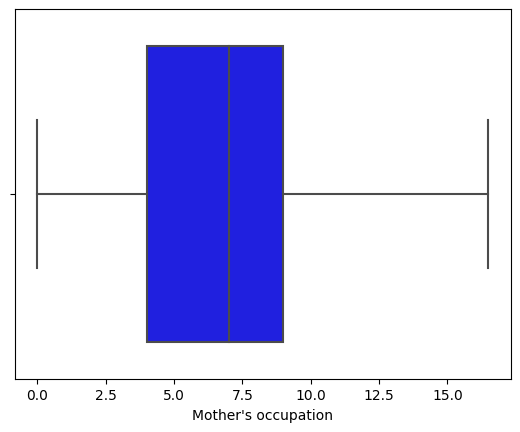

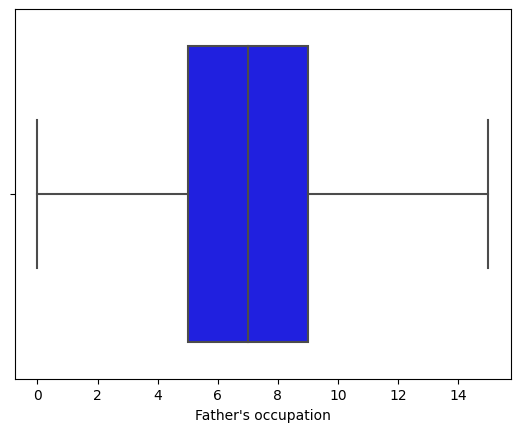

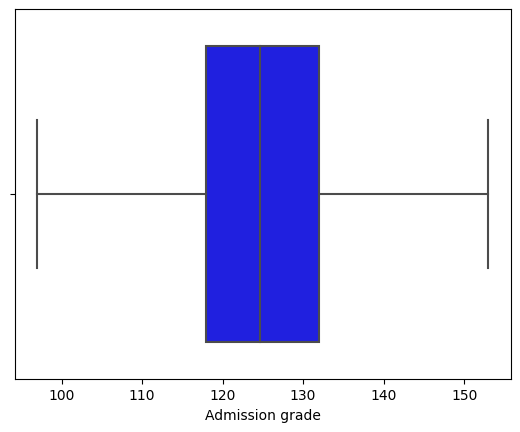

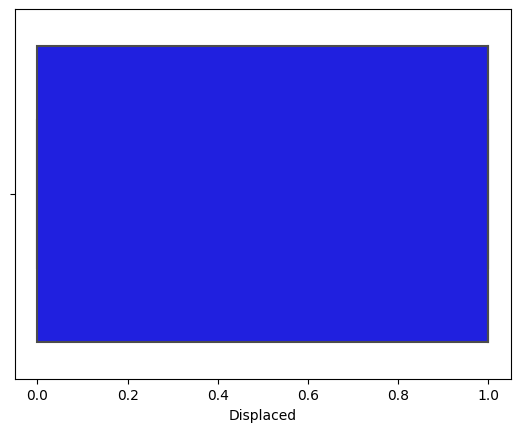

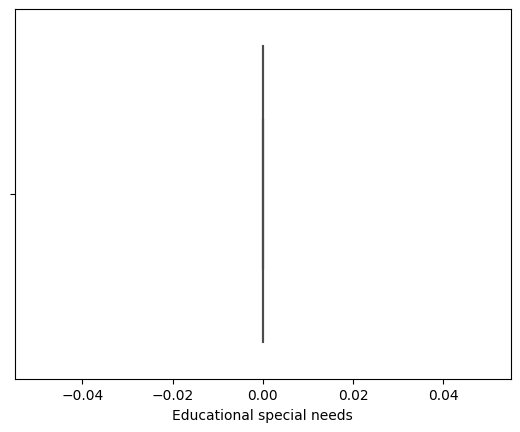

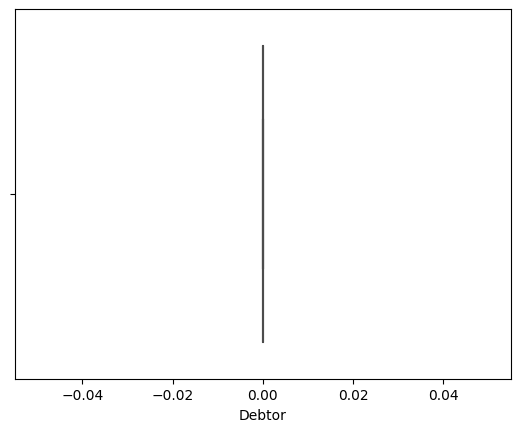

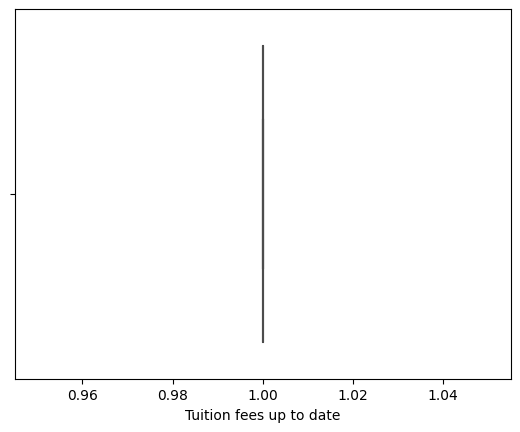

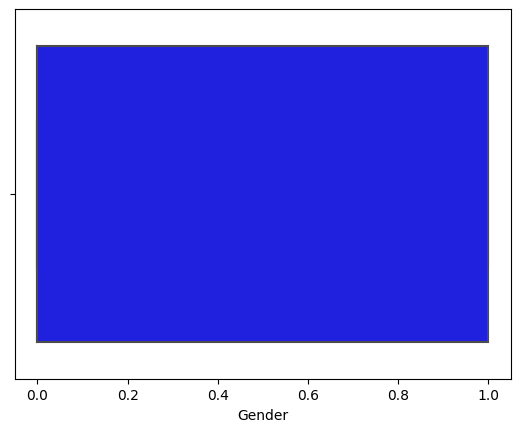

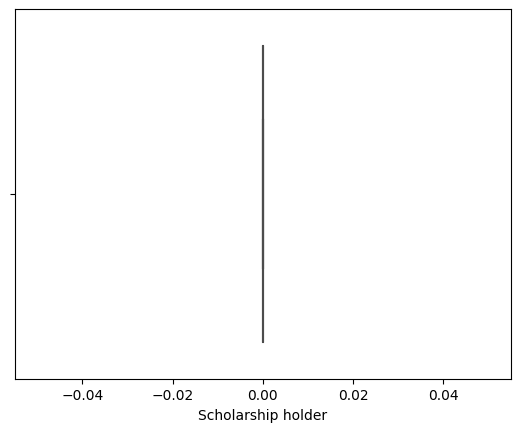

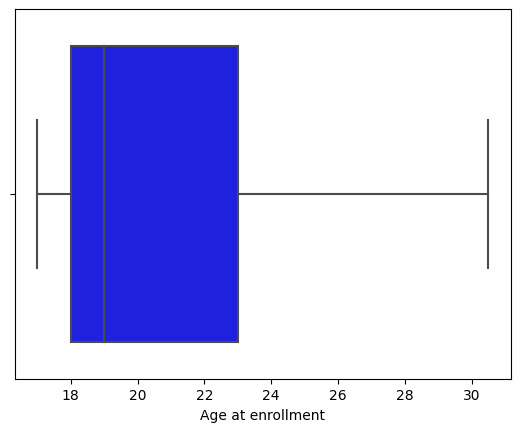

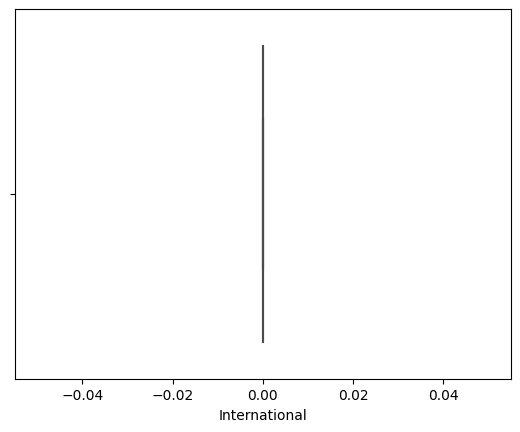

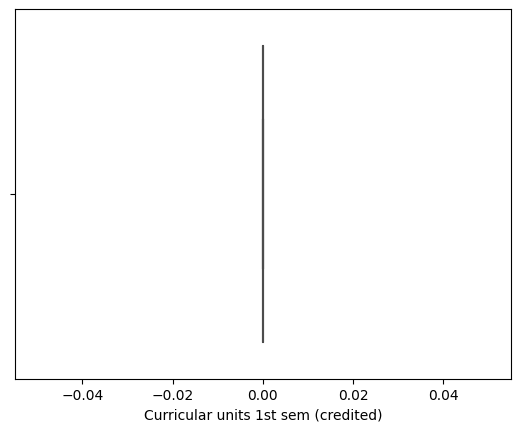

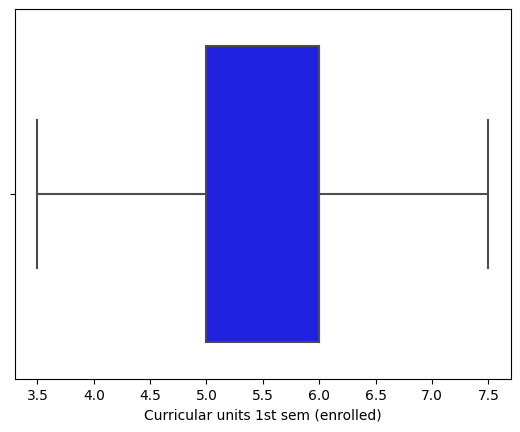

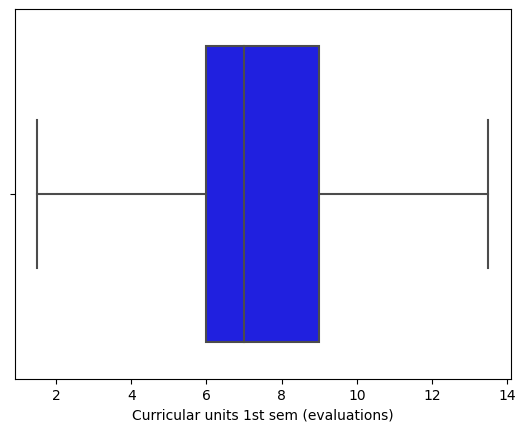

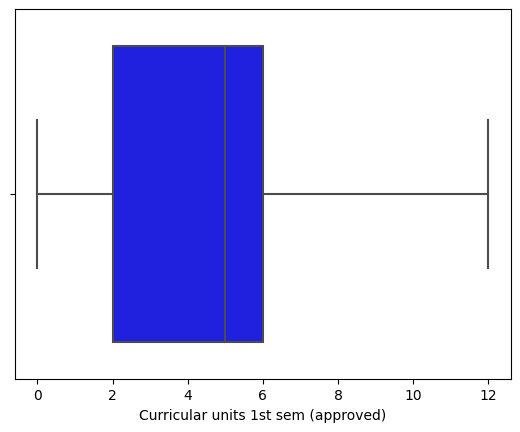

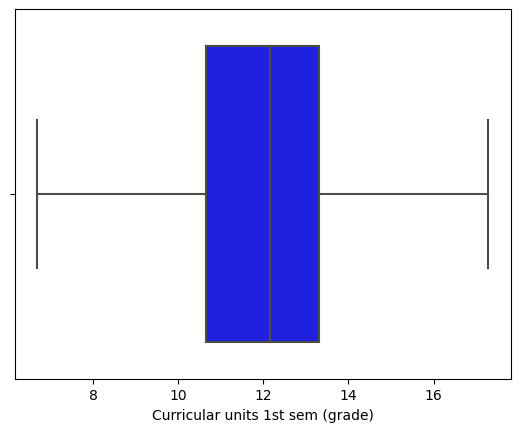

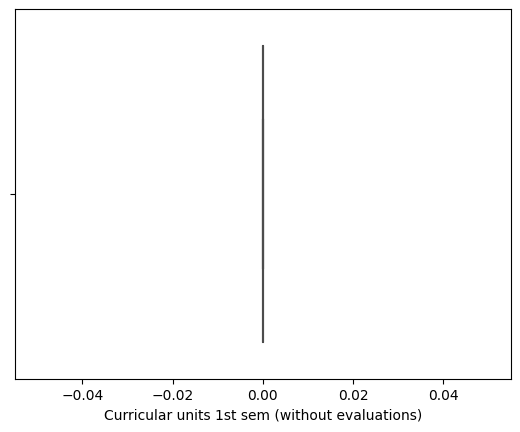

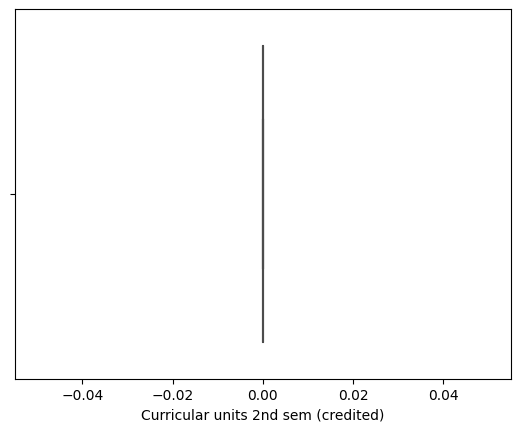

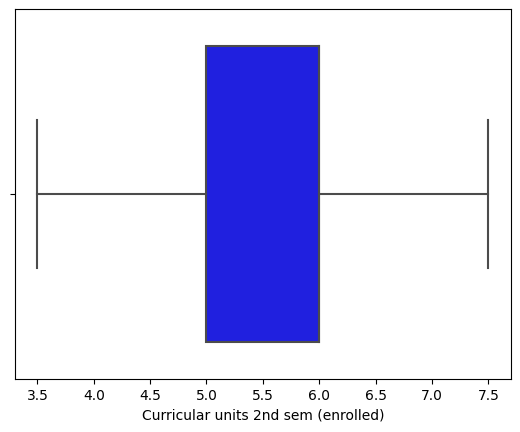

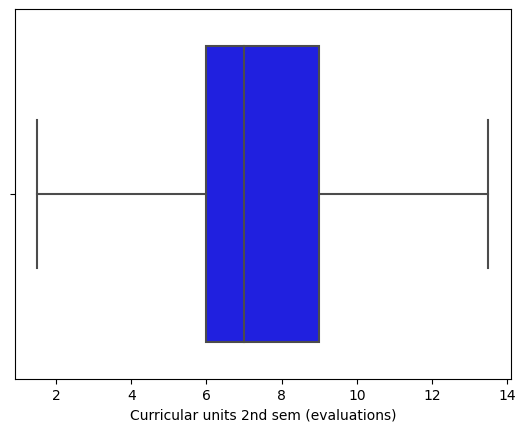

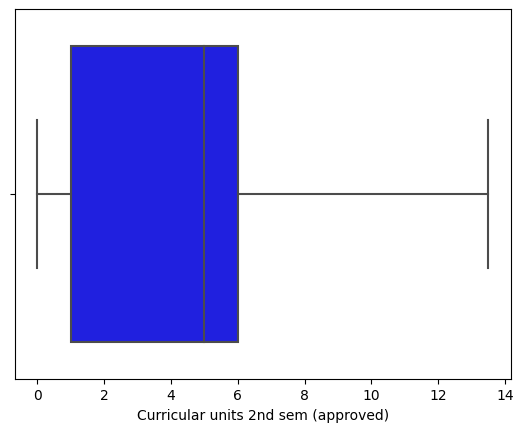

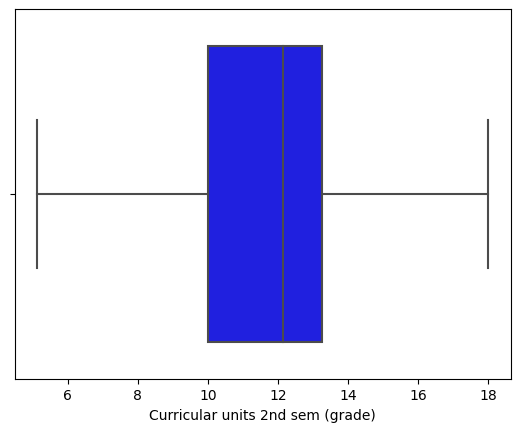

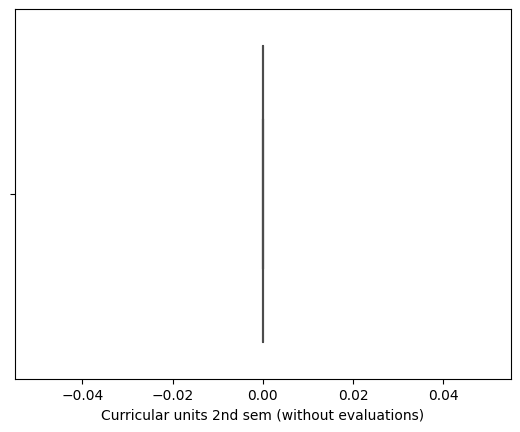

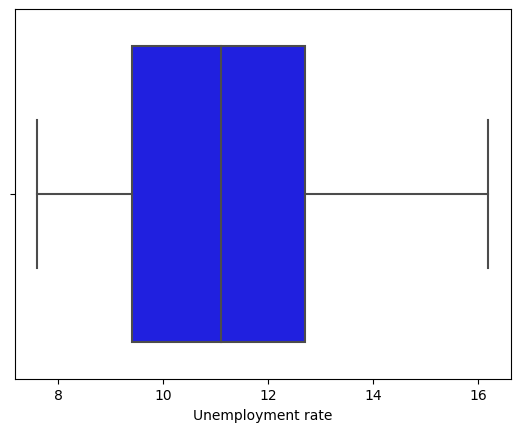

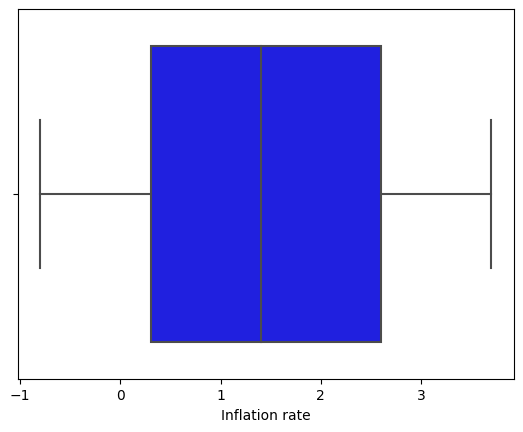

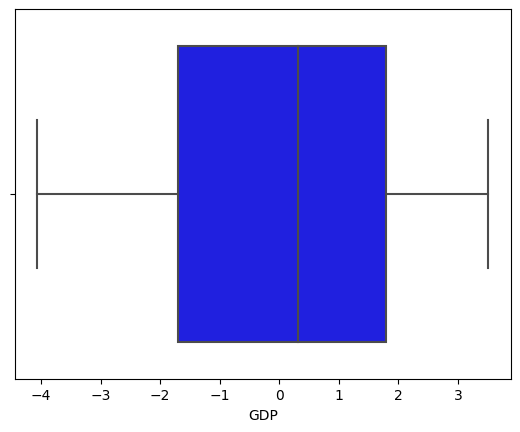

In [18]:
for i in cols:
    sns.boxplot(data = df_train, x = i, color = "blue")
    plt.show()

In [20]:
df_train["Target"] = df_train["Target"].replace({'Graduate':1, 'Enrolled': 2, 'Dropout': 0})

/tmp/ipykernel_33/1293363994.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Target"] = df_train["Target"].replace({'Graduate':1, 'Enrolled': 2, 'Dropout': 0})


In [21]:
df_train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,1.0,1.0,1.0,9238.0,1.0,1.0,126.0,1.0,1.0,...,0.0,6.0,7.0,6.0,12.428571,0.0,11.1,0.6,2.02,1
1,1.0,1.0,17.0,1.0,9238.0,1.0,1.0,125.0,1.0,19.0,...,0.0,6.0,9.0,0.0,5.133929,0.0,11.1,0.6,2.02,0
2,2.0,1.0,17.0,2.0,9254.0,1.0,1.0,137.0,1.0,3.0,...,0.0,6.0,1.5,0.0,5.133929,0.0,16.2,0.3,-0.92,0
3,3.0,1.0,1.0,3.0,9500.0,1.0,1.0,131.0,1.0,19.0,...,0.0,7.5,11.0,7.0,12.820000,0.0,11.1,0.6,2.02,2
4,4.0,1.0,1.0,2.0,9500.0,1.0,1.0,132.0,1.0,19.0,...,0.0,7.0,12.0,6.0,12.933333,0.0,7.6,2.6,0.32,1


In [29]:
df_train.shape

(76518, 38)

In [25]:
X = df_train.drop(["Target", "id"], axis = 1)
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1.0,1.0,1.0,9238.0,1.0,1.0,126.0,1.0,1.0,19.0,...,0.0,0.0,6.0,7.0,6.0,12.428571,0.0,11.1,0.6,2.02
1,1.0,17.0,1.0,9238.0,1.0,1.0,125.0,1.0,19.0,19.0,...,0.0,0.0,6.0,9.0,0.0,5.133929,0.0,11.1,0.6,2.02
2,1.0,17.0,2.0,9254.0,1.0,1.0,137.0,1.0,3.0,19.0,...,0.0,0.0,6.0,1.5,0.0,5.133929,0.0,16.2,0.3,-0.92
3,1.0,1.0,3.0,9500.0,1.0,1.0,131.0,1.0,19.0,3.0,...,0.0,0.0,7.5,11.0,7.0,12.820000,0.0,11.1,0.6,2.02
4,1.0,1.0,2.0,9500.0,1.0,1.0,132.0,1.0,19.0,37.0,...,0.0,0.0,7.0,12.0,6.0,12.933333,0.0,7.6,2.6,0.32


In [26]:
y = df_train["Target"]
y.head()

0    1
1    0
2    0
3    2
4    1
Name: Target, dtype: int64

In [31]:
df_test2 = df_test.drop(["id"], axis = 1)
df_test2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9500,1,1,141.0,1,3,1,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,1,1,1,9238,1,1,128.0,1,1,19,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,1,1,1,9238,1,1,118.0,1,1,19,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,1,44,1,9147,1,39,130.0,1,1,19,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,1,39,1,9670,1,1,110.0,1,1,37,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((61214, 36), (15304, 36), (61214,), (15304,))

In [32]:
d_train = xgb.DMatrix(X_train, label = y_train)
d_train

In [33]:
d_test = xgb.DMatrix(X_test, label = y_test)
d_test

In [34]:
params = {'objective': 'multi:softmax', 'num_class': 3, 'max_depth': 3, 'eta': 0.3, 'seed': 42}

In [35]:
n_round = 100

In [37]:
model = xgb.train(params, d_train, n_round)
model

In [38]:
preds = model.predict(d_test)
preds

array([0., 0., 2., ..., 1., 0., 1.], dtype=float32)

score

In [39]:
score = accuracy_score(y_test, preds)
score

0.8120099320439101

In [41]:
d_test2 = xgb.DMatrix(df_test2)
d_test2

In [42]:
preds2 = model.predict(d_test2)
preds2

array([0., 1., 1., ..., 0., 2., 0.], dtype=float32)

In [43]:
preds2.shape

(51012,)

In [45]:
submission = pd.DataFrame(preds2)
submission.head()

,0
0,0.0
1,1.0
2,1.0
3,2.0
4,2.0


In [46]:
submission.isnull().sum()/len(submission)*100

0    0.0
dtype: float64

In [53]:
final_sub =  pd.concat([files[0].iloc[:, 0], submission], axis=1)
final_sub.to_csv('submission2.csv', index=False)

In [54]:
final = pd.read_csv("submission2.csv")
final.head()

,id,0
0,76518,0.0
1,76519,1.0
2,76520,1.0
3,76521,2.0
4,76522,2.0


In [51]:
sub_f=pd.concat([df_test['id'],submission],axis=1)
sub_f=sub_f.rename(columns={0:'Target'})
sub_f['Target']=sub_f['Target'].replace({
    1:'Graduate',
    2:'Enrolled',
    0:'Dropout'
})

In [52]:
sub_f.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [55]:
sub_f.to_csv("submission.csv", index = False)